In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from helpers import figures

# plt.rcParams["mathtext.fontset"] = "custom"

figures.initialize()

data4K = pd.read_csv("data-4K.csv", header=4, index_col=["contact (mm)", "Twarm, Point: 1"])
data6K = pd.read_csv("data-6K.csv", header=4, index_col=["contact (mm)", "Twarm, Point: 1"])
data10K = pd.read_csv("data-10K.csv", header=4, index_col=["contact (mm)", "Twarm, Point: 1"])
data20K = pd.read_csv("data-20K.csv", header=4, index_col=["contact (mm)", "Twarm, Point: 1"])
# sorted(matplotlib.font_manager.get_font_names())
fig, axs = plt.subplots(
    2, 2, sharey=True, sharex=True, figsize=figures.set_size(1, subplots=(2,2))
)

# 6K
filtered_data = data6K["T-Tcold (K), Point: 1"].swaplevel(0, -1).unstack(level=0)
min_anchor_mK = []
min_anchor_uK = []
for temperature in filtered_data.columns:
    interpolation = scipy.interpolate.interp1d(
        filtered_data[temperature],
        filtered_data[temperature].index,
        kind="quadratic",
        fill_value="extrapolate",
    )
    # xs = np.logspace(-6, -3)
    # ys = interpolation(xs)
    # plt.plot(xs, ys)
    min_anchor_mK.append(interpolation(1e-3))
    min_anchor_uK.append(interpolation(1e-4))
axs[0, 0].plot(filtered_data.columns, min_anchor_mK, marker=".", label="1 mK")
axs[0, 0].plot(filtered_data.columns, min_anchor_uK, marker=".", label="0.1 mK")
axs[0, 0].text(
    x=50,
    y=5,
    s=r"$T_{\text{anchor}} = 4\,$K",
    horizontalalignment="center",
    verticalalignment="bottom",
)

# 6K
filtered_data = data6K["T-Tcold (K), Point: 1"].swaplevel(0, -1).unstack(level=0)
min_anchor_mK = []
min_anchor_uK = []
for temperature in filtered_data.columns:
    interpolation = scipy.interpolate.interp1d(
        filtered_data[temperature],
        filtered_data[temperature].index,
        kind="quadratic",
        fill_value="extrapolate",
    )
    # xs = np.logspace(-6, -3)
    # ys = interpolation(xs)
    # plt.plot(xs, ys)
    min_anchor_mK.append(interpolation(1e-3))
    min_anchor_uK.append(interpolation(1e-4))
axs[0, 1].plot(filtered_data.columns, min_anchor_mK, marker=".", label="1 mK")
axs[0, 1].plot(filtered_data.columns, min_anchor_uK, marker=".", label="0.1 mK")
axs[0, 1].text(
    x=50,
    y=5,
    s=r"$T_{\text{anchor}} = 6\,$K",
    horizontalalignment="center",
    verticalalignment="bottom",
)


# 10 K
filtered_data = data10K["T-Tcold (K), Point: 1"].swaplevel(0, -1).unstack(level=0)
min_anchor_mK = []
min_anchor_uK = []
for temperature in filtered_data.columns:
    interpolation = scipy.interpolate.interp1d(
        filtered_data[temperature],
        filtered_data[temperature].index,
        kind="quadratic",
        fill_value="extrapolate",
    )
    # xs = np.logspace(-6, -3)
    # ys = interpolation(xs)
    # plt.plot(xs, ys)
    min_anchor_mK.append(interpolation(1e-3))
    min_anchor_uK.append(interpolation(1e-4))
axs[1, 0].plot(filtered_data.columns, min_anchor_mK, marker=".", label="1 mK")
axs[1, 0].plot(filtered_data.columns, min_anchor_uK, marker=".", label="0.1 mK")
axs[1, 0].text(
    x=50,
    y=5,
    s=r"$T_{\text{anchor}} = 10\,$K",
    horizontalalignment="center",
    verticalalignment="bottom",
)

# 20 K
filtered_data = data20K["T-Tcold (K), Point: 1"].swaplevel(0, -1).unstack(level=0)
min_anchor_mK = []
min_anchor_uK = []
for temperature in filtered_data.columns:
    interpolation = scipy.interpolate.interp1d(
        filtered_data[temperature],
        filtered_data[temperature].index,
        kind="quadratic",
        fill_value="extrapolate",
    )
    # xs = np.logspace(-6, -3)
    # ys = interpolation(xs)
    # plt.plot(xs, ys)
    min_anchor_mK.append(interpolation(1e-3))
    min_anchor_uK.append(interpolation(1e-4))
axs[1, 1].plot(filtered_data.columns, min_anchor_mK, marker=".", label="1 mK")
last_plot = axs[1, 1].plot(filtered_data.columns, min_anchor_uK, marker=".", label="0.1 mK")
axs[1, 1].text(
    x=50,
    y=5,
    s=r"$T_{\text{anchor}} = 20\,$K",
    horizontalalignment="center",
    verticalalignment="bottom",
)
axs[1, 1].set_xlim(0, 100)

xlabel = fig.text(
    s=r"Temperature of warm end $T_{\text{warm}}$ (K)", x=0.5, y=0, horizontalalignment="center"
)
ylabel = fig.text(
    s="Required thermal anchor length (mm)",
    x=0,
    y=0.55,
    va="center",
    rotation="vertical",
)
axs[1, 1].legend(title=r"$T_{\text{wire}}-T_{\text{anchor}}$", loc="center right")
# plt.setp(axs, xlim=0, ylim=100)
fig.get_layout_engine().set(w_pad=15 / 72, h_pad=15 / 72, hspace=0.1,
                            wspace=0.01)
fig.savefig(
    "thermal-anchor.pgf",
    bbox_extra_artists=[xlabel, ylabel],
    bbox_inches='tight'
)

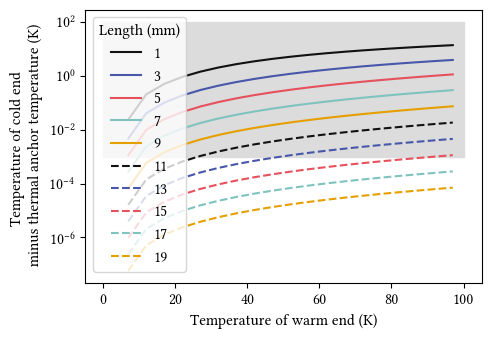

In [21]:
fig = plt.figure(figsize=figures.set_size())
ax = plt.subplot(111)
filtered_data = data["DeltaT"].swaplevel(0, -1).unstack(level=0)
# filtered_data = filtered_data[filtered_data.index > 2]

filtered_data.index = [round(i) for i in filtered_data.index]
first_data = (
    filtered_data[filtered_data.index < 10].stack(level=0).swaplevel(0, -1).unstack(level=1)
)
second_data = (
    filtered_data[filtered_data.index > 10].stack(level=0).swaplevel(0, -1).unstack(level=1)
)
ax = first_data.plot(logy=0, ax=ax)
second_data.plot(logy=True, ax=ax, style="--")
ax.legend(title="Length (mm)")
ax.fill_between([0, 100], 1e-3, 100, color="gainsboro")
xlabel = ax.set_xlabel("Temperature of warm end (K)")
ylabel = ax.set_ylabel("Temperature of cold end \n minus thermal anchor temperature (K)")
# plt.tight_layout()
fig.savefig(
    "thermal-anchor.pdf",
    backend="pgf",
    bbox_extra_artists=[xlabel, ylabel],
    bbox_inches="tight",
)
plt.show()

In [134]:
temperatures = np.concatenate((np.linspace(7, 20, num=14), np.linspace(20, 100, num=17)))
print(temperatures)

[  7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.
  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.
  90.  95. 100.]
